In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from pygeocoder import Geocoder
import numpy as np
from cycler import cycler

In [178]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Futura Std',
    'font.style' : 'normal',
    'font.weight' : '100',
    'font.stretch' : 'ultra-condensed',
    
    'figure.facecolor'    : '#FDF6E3',

    
    'patch.antialiased'   : True,

    'lines.linewidth'     : 2.0,
    'lines.solid_capstyle': 'butt',

    'axes.titlesize'      : 16,
    'axes.labelsize'      : 12,
    'axes.labelcolor'     : '#657b83',
    'axes.facecolor'      : '#eee8d5',
    'axes.edgecolor'      : '#eee8d5',
    'axes.axisbelow'      : True,
    'axes.prop_cycle'    : cycler('color', ['#268BD2','#d26c3d', '#dbd7ad', '#f6c5af', '#d7da00', '#7db49f', '#86a3ba']),

    'axes.grid'           : False,
    'grid.color'          : '#ffffff',    # grid color
    'grid.linestyle'      : ':',         # line
    'grid.linewidth'      : 1,        # in points

    ### TICKS
    'xtick.color'         : '#657b83',
    'xtick.direction'     : 'out',

    'ytick.color'         : '#657b83',
    'ytick.direction'     : 'out',
    
})

In [180]:
df=pd.read_csv('Multiple Cause of Death, 1999-2014 v1.1.csv')

In [181]:
df.head()

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions)
0,Alabama,1999,39,4430141,0.9,0.6,1.2,116
1,Alabama,2000,46,4447100,1,0.8,1.4,126
2,Alabama,2001,67,4467634,1.5,1.2,1.9,138
3,Alabama,2002,75,4480089,1.7,1.3,2.1,142
4,Alabama,2003,54,4503491,1.2,0.9,1.6,149


In [182]:
df.rename(columns={'State': 'state', 'Year': 'year', 'Deaths': 'deaths', 'Population': 'population', 'Crude Rate': 'deathsper100k', 'Prescriptions Dispensed by US Retailers in that year (millions)': 'prescriptionsinmillions'}, inplace=True)

In [183]:
df.replace('Suppressed', np.NaN, inplace=True)
df.replace('Unreliable', np.NaN, inplace=True)

In [184]:
df['deaths'] = pd.to_numeric(df['deaths'])

In [185]:
df[['state','year','deaths','population','deathsper100k']].sort_values(by='deaths', ascending=False).head(20)

,state,year,deaths,population,deathsper100k
575,Ohio,2014,2175.0,11594163,18.8
79,California,2014,2159.0,38802500,5.6
74,California,2009,2128.0,36961229,5.8
78,California,2013,2088.0,38332521,5.4
75,California,2010,2059.0,37253956,5.5
76,California,2011,2057.0,37691912,5.5
73,California,2008,1889.0,36604337,5.2
77,California,2012,1847.0,38041430,4.9
527,New York,2014,1787.0,19746227,9
72,California,2007,1762.0,36250311,4.9


In [186]:
df[['state','year','deaths','population','deathsper100k']].sort_values(by='deathsper100k', ascending=False).head(20)

,state,year,deaths,population,deathsper100k
42,Arizona,2009,625.0,6343154,9.9
143,District of Columbia,2014,65.0,658893,9.9
95,Colorado,2014,532.0,5355866,9.9
815,Wyoming,2014,57.0,584153,9.8
507,New Mexico,2010,201.0,2059179,9.8
223,Illinois,2014,1263.0,12880580,9.8
543,North Carolina,2014,979.0,9943964,9.8
757,Washington,2004,606.0,6178645,9.8
450,Nevada,2001,205.0,2098399,9.8
346,Massachusetts,2009,636.0,6517613,9.8


In [187]:
df['deathsper100k'] = df.deathsper100k.astype(float)

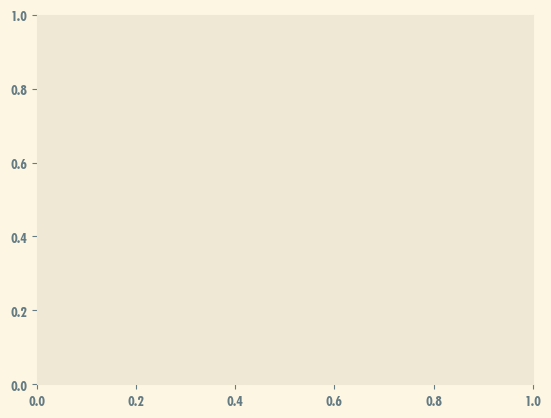

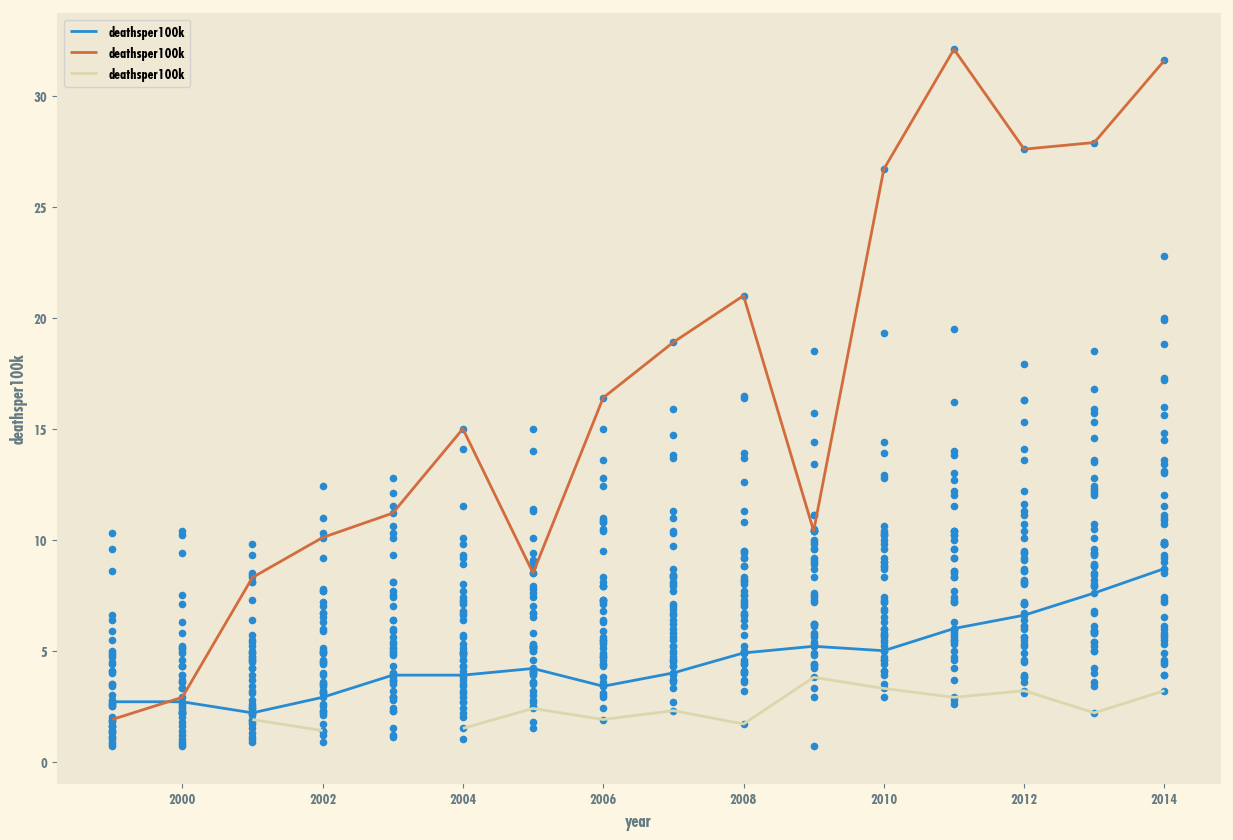

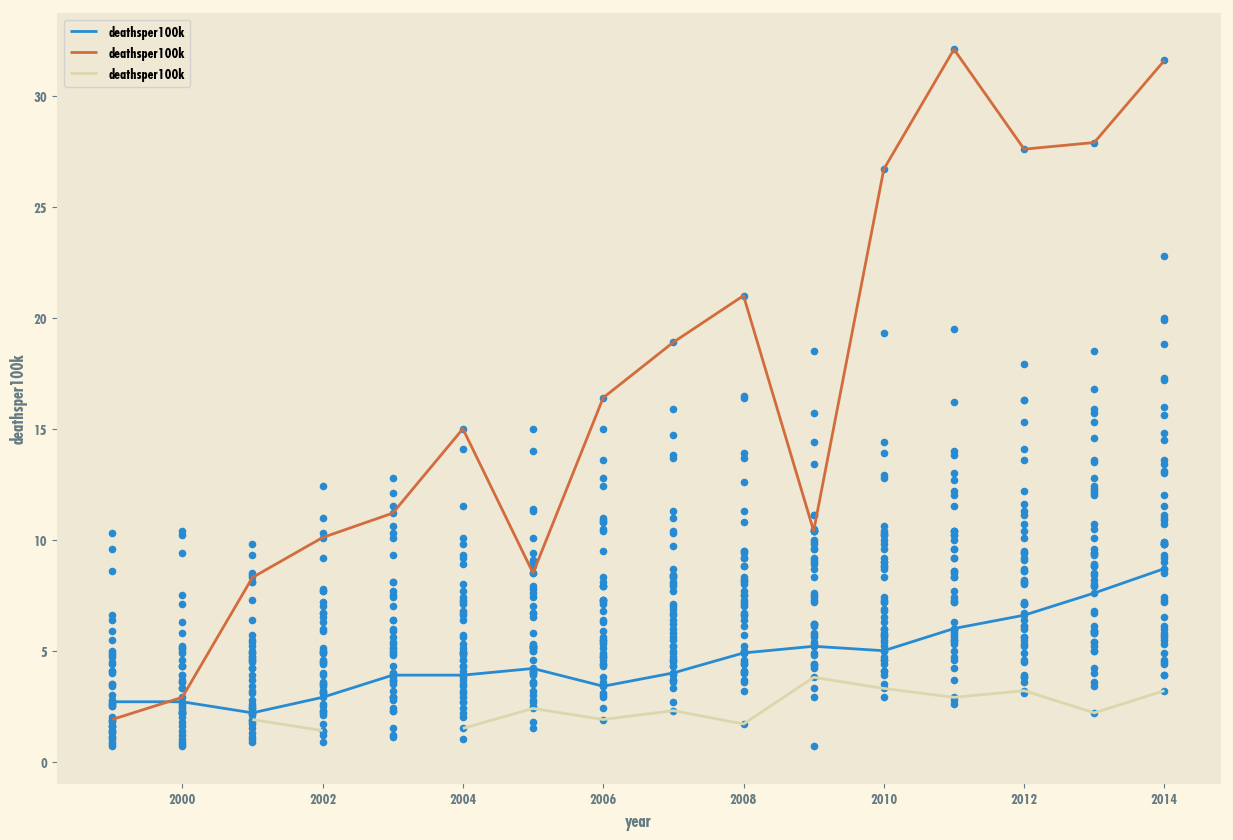

In [189]:
fig, ax = plt.subplots()

df.groupby('state').plot(kind='scatter', x='year', y='deathsper100k', figsize = (15,10), ax=ax)

df[df['state'] == 'Pennsylvania'].plot(x='year',y='deathsper100k', ax=ax)
df[df['state'] == 'West Virginia'].plot(x='year',y='deathsper100k', ax=ax)
# df[df['state'] == 'New Hampshire'].plot(x='year',y='deathsper100k', ax=ax)
# df[df['state'] == 'New Jersey'].plot(x='year',y='deathsper100k', ax=ax)
df[df['state'] == 'Nebraska'].plot(x='year',y='deathsper100k', ax=ax)
plt.show()

In [162]:
df[df.year == 2014].sort_values(by='deathsper100k')

,state,year,deaths,population,deathsper100k,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,prescriptionsinmillions
447,Nebraska,2014,60.0,1881503,3.2,2.4,4.1,196
399,Mississippi,2014,117.0,2994079,3.9,3.2,4.6,196
671,South Dakota,2014,33.0,853175,3.9,2.7,5.4,196
191,Hawaii,2014,62.0,1419561,4.4,3.3,5.6,196
703,Texas,2014,1219.0,26956958,4.5,4.3,4.8,196
559,North Dakota,2014,34.0,739482,4.6,3.2,6.4,196
207,Idaho,2014,80.0,1634464,4.9,3.9,6.1,196
431,Montana,2014,54.0,1023579,5.3,4,6.9,196
255,Iowa,2014,170.0,3107126,5.5,4.6,6.3,196
79,California,2014,2159.0,38802500,5.6,5.3,5.8,196


In [168]:
df_county = pd.read_csv('Multiple Cause of Death, 1999-2016-2.txt', delimiter='\t')
df_county.head()

,Notes,County,County Code,Year,Year Code,Deaths,Population,Crude Rate,Age Adjusted Rate,% of Total Deaths
0,NaN,"Adams County, PA",42001,1999,1999,Suppressed,90363,Suppressed,Suppressed,Suppressed
1,NaN,"Adams County, PA",42001,2000,2000,Suppressed,91292,Suppressed,Suppressed,Suppressed
2,NaN,"Adams County, PA",42001,2001,2001,Suppressed,92591,Suppressed,Suppressed,Suppressed
3,NaN,"Adams County, PA",42001,2002,2002,Suppressed,93934,Suppressed,Suppressed,Suppressed
4,NaN,"Adams County, PA",42001,2003,2003,Suppressed,95503,Suppressed,Suppressed,Suppressed


In [169]:
df_county.rename(columns={'County': 'county', 'Year': 'year', 'Deaths': 'deaths', 'Population': 'population', 'Crude Rate': 'deathsper100k'}, inplace=True)
df_county.drop(['Notes', 'Year Code', 'County Code'], axis=1, inplace=True)
df_county.replace('Suppressed', np.NaN, inplace=True)
df_county.replace('Unreliable',np.NaN, inplace=True)
df_county['deathsper100k'] = df_county.deathsper100k.astype(float)
df_county['deaths'] = df_county.deaths.astype(float)

In [176]:
df_county.sort_values(by='% of Total Deaths',ascending=False).head()

,county,year,deaths,population,deathsper100k,Age Adjusted Rate,% of Total Deaths
917,"Philadelphia County, PA",2016,751.0,1567872,47.9,47.9,2.0%
35,"Allegheny County, PA",2016,635.0,1225365,51.8,52.0,1.7%
916,"Philadelphia County, PA",2015,581.0,1567442,37.1,36.9,1.6%
915,"Philadelphia County, PA",2014,527.0,1560297,33.8,34.0,1.4%
913,"Philadelphia County, PA",2012,480.0,1547607,31.0,31.6,1.3%


In [170]:
df_philly = df_county[df_county.county == 'Philadelphia County, PA'].sort_values(by='year')
df_philly

,county,year,deaths,population,deathsper100k,Age Adjusted Rate,% of Total Deaths
900,"Philadelphia County, PA",1999,310.0,1520064,20.4,21.1,0.8%
901,"Philadelphia County, PA",2000,378.0,1517550,24.9,26.2,1.0%
902,"Philadelphia County, PA",2001,321.0,1505455,21.3,22.4,0.9%
903,"Philadelphia County, PA",2002,315.0,1498493,21.0,22.1,0.9%
904,"Philadelphia County, PA",2003,297.0,1493802,19.9,21.0,0.8%
905,"Philadelphia County, PA",2004,336.0,1492882,22.5,23.5,0.9%
906,"Philadelphia County, PA",2005,400.0,1490861,26.8,27.5,1.1%
907,"Philadelphia County, PA",2006,462.0,1488710,31.0,32.2,1.2%
908,"Philadelphia County, PA",2007,366.0,1493309,24.5,24.9,1.0%
909,"Philadelphia County, PA",2008,388.0,1499731,25.9,26.6,1.0%


In [171]:
df_philly.deathsper100k

900    20.4
901    24.9
902    21.3
903    21.0
904    19.9
905    22.5
906    26.8
907    31.0
908    24.5
909    25.9
910    23.7
911    23.1
912    29.0
913    31.0
914    26.8
915    33.8
916    37.1
917    47.9
Name: deathsper100k, dtype: float64

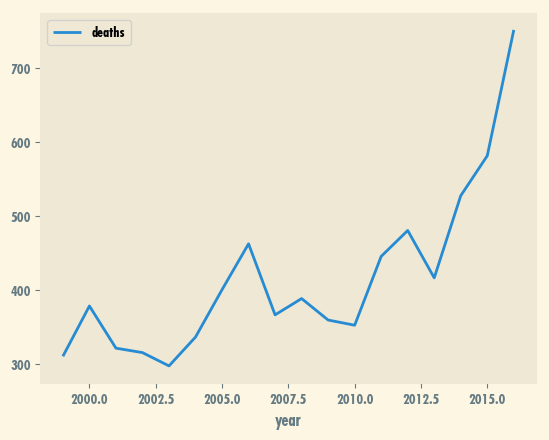

In [190]:
df_philly.plot(x='year', y='deaths')
plt.show()